In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# 출력 옵션 변경
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 100)

In [104]:
# 2018년 수질 데이터
df = pd.read_excel('../data/water_2018.xlsx')
df.head()

,검사월,수도사업자,시설명,소재지,수원,시설용량(㎥/일),채수년월일,일반세균(기준:100/ 단위:(CFU/mL)),총대장균군(기준:0/ 단위:MPN),대장균/분원성대장균군(기준:0/ 단위:MPN),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,강북,경기도 남양주시,하천수,1000000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,적합,적합,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,광암,경기도 하남시,하천수,400000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,적합,적합,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,구의,서울특별시 광진구,하천수,500000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,적합,적합,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,0.05,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,뚝도,서울특별시 성동구,하천수,700000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,적합,적합,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,0.05,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,암사,서울특별시 강동구,하천수,1600000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,적합,적합,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,0.05,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


In [105]:
df.shape

(4985, 66)

In [106]:
# 필요없는 컬럼 drop
df.drop(['시설명', '소재지', '수원', '채수년월일'], axis=1, inplace=True)

In [107]:
# dtype 확인 - object: 총대장균, 대장균, 냄새, 맛
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   검사월                                     4985 non-null   object 
 1   수도사업자                                   4985 non-null   object 
 2   시설용량(㎥/일)                               4985 non-null   int64  
 3   일반세균(기준:100/ 단위:(CFU/mL))               4985 non-null   int64  
 4   총대장균군(기준:0/ 단위:MPN)                     4985 non-null   object 
 5   대장균/분원성대장균군(기준:0/ 단위:MPN)               4985 non-null   object 
 6   납(기준:0.01/ 단위:(mg/L))                   4953 non-null   float64
 7   불소(기준:1.5/ 단위:(mg/L))                   4985 non-null   float64
 8   비소(기준:0.01/ 단위:(mg/L))                  4953 non-null   float64
 9   셀레늄(기준:0.01/ 단위:(mg/L))                 4953 non-null   float64
 10  수은(기준:0.001/ 단위:(mg/L))                 4953 non-null   floa

In [108]:
# 총대장균, 대장균 컬럼(8~9열)에서 '불검출' 개수 확인하여 많으면 컬럼을 삭제하도록 함
# df.iloc[:, 8].value_counts()
# df.iloc[:, 9].value_counts()

# 위 두 컬럼은 제외
df = df.drop(['총대장균군(기준:0/ 단위:MPN)', '대장균/분원성대장균군(기준:0/ 단위:MPN)'], axis=1)
df.head(2)

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,적합,적합,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,적합,적합,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0,0.0,0.002,0.003,0.0,0.0


In [109]:
# 냄새, 맛 컬럼
# df.loc[:, '냄새(기준:0/ 단위:(mg/L))'].value_counts()   
# df.loc[:, '맛(기준:0/ 단위:(mg/L))'].value_counts()        # 모두 적합이므로 컬럼 삭제

df = df.drop(['냄새(기준:0/ 단위:(mg/L))', '맛(기준:0/ 단위:(mg/L))'], axis=1)
df.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,0.05,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,0.05,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,0.05,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


In [110]:
df.shape

(4985, 58)

In [115]:
# 0을 NaN으로 바꾼 뒤, 2500개 이상이면 drop
# df.replace(0, np.nan, inplace=True)

# 모든 컬럼에 대하여 결측치 개수 확인
df.isnull().sum()                          # 전체 약 5천개 데이터 중 대부분이 NaN인 데이터가 너무 많음 -> 모두 drop

검사월                                          0
수도사업자                                        0
시설용량(㎥/일)                                    0
일반세균(기준:100/ 단위:(CFU/mL))                 4943
납(기준:0.01/ 단위:(mg/L))                     4982
불소(기준:1.5/ 단위:(mg/L))                     4034
비소(기준:0.01/ 단위:(mg/L))                    4952
셀레늄(기준:0.01/ 단위:(mg/L))                   4964
수은(기준:0.001/ 단위:(mg/L))                   4985
시안(기준:0.01/ 단위:(mg/L))                    4983
크롬(기준:0.05/ 단위:(mg/L))                    4985
암모니아성질소(기준:0.5/ 단위:(mg/L))                4829
질산성질소(기준:10/ 단위:(mg/L))                    158
카드뮴(기준:0.005/ 단위:(mg/L))                  4984
붕소(기준:1/ 단위:(mg/L))                       2646
페놀(기준:0.005/ 단위:(mg/L))                   4985
다이아지논(기준:0.02/ 단위:(mg/L))                 4984
파라티온(기준:0.06/ 단위:(mg/L))                  4985
1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))    4962
페니트로티온(기준:0.04/ 단위:(mg/L))                4985
카바릴(기준:0.07/ 단위:(mg/L))                   4984
1,1,1-트리클로로에탄

In [116]:
# 물 전처리 파일: water
water = df.dropna(axis=1, thresh=2500)
print(water.shape)
print(water.columns)

(4985, 20)
Index(['검사월', '수도사업자', '시설용량(㎥/일)', '질산성질소(기준:10/ 단위:(mg/L))',
       '경도(기준:300/ 단위:(mg/L))', '과망간산칼륨소비량(기준:10/ 단위:(mg/L))',
       '수소이온농도(기준:5.8 ~ 8.5/ 단위:-)', '아연(기준:3/ 단위:(mg/L))',
       '염소이온(기준:250/ 단위:(mg/L))', '증발잔류물(기준:500/ 단위:(mg/L))',
       '탁도(기준:0.5/ 단위:(NTU))', '황산이온(기준:200/ 단위:(mg/L))',
       '총트리할로메탄(기준:0.1/ 단위:(mg/L))', '잔류염소(기준:4/ 단위:(mg/L))',
       '클로로포름(기준:0.08/ 단위:(mg/L))', '클로랄하이드레이트(기준:0.03/ 단위:(mg/L))',
       '디클로로아세토니트릴(기준:0.09/ 단위:(mg/L))', '할로아세틱에시드(기준:0.1/ 단위:(mg/L))',
       '브로모디클로로메탄(기준:0.03/ 단위:(mg/L))', '디브로모클로로메탄(기준:0.1/ 단위:(mg/L))'],
      dtype='object')


In [137]:
# 남은 NaN은 다시 0으로 되돌리기
# water.fillna(0, inplace=True)
water

C:\Users\sori-\anaconda3\lib\site-packages\pandas\core\frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,검사월,지역,시설용량(㎥/일),질산성질소(기준:10/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,2.0,70.0,1.0,7.1,0.000,23.7,141.0,0.05,15.0,0.010,0.42,0.007,0.0000,0.0000,0.005,0.003,0.000
1,2018-01,서울특별시,400000,2.0,68.0,1.2,7.1,0.005,22.5,134.0,0.05,14.0,0.009,0.29,0.006,0.0007,0.0000,0.002,0.003,0.000
2,2018-01,서울특별시,500000,2.2,72.0,0.5,7.2,0.000,28.0,155.0,0.05,17.0,0.013,0.34,0.009,0.0006,0.0000,0.005,0.004,0.000
3,2018-01,서울특별시,700000,2.3,74.0,0.7,7.3,0.000,28.3,157.0,0.05,18.0,0.013,0.35,0.010,0.0000,0.0000,0.003,0.003,0.000
4,2018-01,서울특별시,1600000,2.3,75.0,1.1,7.2,0.005,29.8,163.0,0.05,18.0,0.010,0.40,0.007,0.0008,0.0005,0.006,0.003,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,2018-12,제주특별자치도,37000,4.1,44.0,0.0,7.9,0.002,13.9,105.0,0.06,5.0,0.000,0.40,0.000,0.0000,0.0000,0.000,0.000,0.000
4981,2018-12,제주특별자치도,4000,2.0,23.0,0.0,7.7,0.003,7.7,73.0,0.04,3.0,0.000,0.32,0.000,0.0000,0.0000,0.000,0.000,0.000
4982,2018-12,제주특별자치도,10000,6.4,50.0,0.0,7.8,0.000,11.7,107.0,0.04,5.0,0.000,0.74,0.000,0.0000,0.0000,0.000,0.000,0.000
4983,2018-12,제주특별자치도,16000,0.2,51.0,0.0,8.2,0.007,8.0,151.0,0.04,2.0,0.000,0.41,0.000,0.0000,0.0000,0.000,0.000,0.000


In [119]:
# water.rename({'수도사업자':'지역'}, axis=1, inplace=True)
water.head(2)

,검사월,지역,시설용량(㎥/일),질산성질소(기준:10/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,2.0,70.0,1.0,7.1,NaN,23.7,141.0,0.05,15.0,0.010,0.42,0.007,NaN,NaN,0.005,0.003,NaN
1,2018-01,서울특별시,400000,2.0,68.0,1.2,7.1,0.005,22.5,134.0,0.05,14.0,0.009,0.29,0.006,0.0007,NaN,0.002,0.003,NaN


* 탁도: NTU --> SiO2 ppm (1mg/1L)
> 굳이 이렇게 바꿔야 하나 싶어서 일단 drop하진 않고 놔둠 (drop하고 싶음!)
* 나중에 분석이 다 끝나고 나면 컬럼명을 간단하게 바꾸는 것이 좋을 수도 있을 듯!

In [209]:
# Analysis
class fx:
    def waterQualByCity():
        '''
        각 지역별 1년 평균 물질 농도를 계산하여 dataframe을 반환하는 함수
        '''
        
        lst = []   # Dataframe 만들기 위해서 준비
        cities = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
        concs = water.columns[3:]
        
        for city in cities:
            ct_conc = [city]        # 한 도시와 모든 물질의 농도를 모은 리스트
            for conc in concs:
                ct_water = water[water['지역'].str.contains(city)]
                #print(ct_water) 
                ct_water['일별물질농도(mg/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000  
                t_conc = ct_water['일별물질농도(mg/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * 0.001   # 2018년, xx지역, xx 물질 평균 농도(mg/L)
                ct_conc.append(t_conc)
            lst.append(ct_conc)
        #print(lst)
        
        result = pd.DataFrame(lst, columns=['지역'] + list(concs))
        return result
            
    
if __name__ == '__main__':
    fx.waterQualByCity() 

C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


,지역,질산성질소(기준:10/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,서울특별시,2.001352,62.901285,1.015382,7.100085,0.003044,22.105477,119.068627,0.054555,13.146214,0.020718,0.466154,0.014005,0.000482,0.000161,0.003264,0.005420,0.001245
1,부산광역시,1.919079,88.890419,1.723975,7.002318,0.004095,33.448007,223.120227,0.089290,46.890419,0.026581,0.688803,0.015177,0.000509,0.000001,0.001614,0.007573,0.003311
2,대구광역시,2.038868,78.080846,2.332214,7.021020,0.003019,30.256032,159.985075,0.061698,24.929726,0.025134,0.571107,0.015242,0.004229,0.001512,0.012088,0.006677,0.002913
3,인천광역시,1.939701,65.949278,1.964980,7.423944,0.000311,21.050077,129.268639,0.067561,13.730467,0.022117,0.807464,0.015513,0.007292,0.003408,0.016367,0.005709,0.000971
4,광주광역시,0.503540,28.404867,1.359292,6.898673,0.002414,9.192920,51.924779,0.055288,5.274336,0.026783,0.611327,0.019697,0.000435,0.002043,0.002088,0.006015,0.000792
5,대전광역시,1.100000,62.437500,2.235417,6.960417,0.001292,17.395833,89.062500,0.060417,10.666667,0.039583,0.611042,0.029333,0.003567,0.003585,0.022521,0.008417,0.001729
6,울산광역시,1.374697,97.396970,2.046818,7.076212,0.003709,40.645303,196.089394,0.070470,47.757576,0.024345,0.580152,0.003089,0.001302,0.001276,0.008798,0.005971,0.009341
7,세종특별자치시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,경기도,1.929949,69.422376,1.612515,7.247292,0.004206,21.218719,120.370248,0.060603,13.987822,0.031161,0.744425,0.022962,0.004108,0.001954,0.017012,0.006717,0.001481
9,강원도,1.582773,54.467170,1.434416,7.194513,0.007443,15.498408,95.117949,0.092320,7.990356,0.016870,0.586482,0.012975,0.000941,0.000517,0.007400,0.002896,0.000634


### 중요한 포인트
* cities 변수와 반환되는 값은 '세종특별자치시'를 포함하고 있음
* 탁도의 NTU도 다른 농도 mg/L와 같은 방식으로 계산되었음
---

In [205]:
# 2008~2018년(4~15 sheet) 건강지표 데이터 - 커서 돌리는데 오래 걸리기 때문에 1년씩 돌렸음
h_idx = ['시도', '비만율(신체계측)_표준화율', '삶의 질 지수(EQ-5D)_표준화율', '양호한 주관적 건강수준 인지율_표준화율', 
         '행복감 지수_표준화율', '스트레스 인지율_표준화율', '우울감 경험률_표준화율', '인지장애 경험률(50세 이상)_표준화율', 
         '주관적 구강건강이 나쁜 인구의 분율_표준화율', '스트레스로 인한 정신상담률_표준화율', '우울증상으로 인한 정신상담률_표준화율', 
         '연간 보건기관 이용률_표준화율']

df1 = pd.read_excel('../data/health_2008_2018.xlsx', sheet_name=15, usecols=h_idx, nrows=18)    # type: dictionary

In [206]:
df1

,시도,비만율(신체계측)_표준화율,삶의 질 지수(EQ-5D)_표준화율,양호한 주관적 건강수준 인지율_표준화율,행복감 지수_표준화율,스트레스 인지율_표준화율,우울감 경험률_표준화율,인지장애 경험률(50세 이상)_표준화율,주관적 구강건강이 나쁜 인구의 분율_표준화율,스트레스로 인한 정신상담률_표준화율,우울증상으로 인한 정신상담률_표준화율,연간 보건기관 이용률_표준화율
0,전국,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,31.3,0.953,44.5,7.1,27.2,6.5,21.6,22.9,10.9,25.7,19.8
2,부산광역시,32.3,0.956,40.4,7.0,23.7,5.5,22.4,26.6,11.0,27.1,21.5
3,대구광역시,32.5,0.959,41.6,7.1,25.1,5.4,20.8,24.0,8.4,23.0,18.2
4,인천광역시,35.1,0.953,38.2,6.9,29.9,7.6,21.5,28.8,10.5,23.5,20.7
5,광주광역시,33.3,0.958,41.3,7.0,28.1,5.4,32.2,27.9,8.2,16.9,21.8
6,대전광역시,30.0,0.967,52.4,7.2,25.2,4.2,15.3,20.8,10.6,31.1,18.4
7,울산광역시,33.1,0.959,43.8,7.1,23.9,5.4,17.6,24.1,8.5,25.1,24.4
8,세종특별자치시,31.0,0.965,44.7,7.5,29.2,4.9,24.4,22.9,6.2,9.7,24.8
9,경기도,33.6,0.956,40.8,7.0,27.7,6.5,23.3,25.4,8.6,21.7,19.7


In [207]:
df1.shape

(18, 12)

In [215]:
# 첫 행 drop
health = df1.drop(index=0)
health.index = range(17)   # index 다시 0부터 시작하도록 재설정
health

,시도,비만율(신체계측)_표준화율,삶의 질 지수(EQ-5D)_표준화율,양호한 주관적 건강수준 인지율_표준화율,행복감 지수_표준화율,스트레스 인지율_표준화율,우울감 경험률_표준화율,인지장애 경험률(50세 이상)_표준화율,주관적 구강건강이 나쁜 인구의 분율_표준화율,스트레스로 인한 정신상담률_표준화율,우울증상으로 인한 정신상담률_표준화율,연간 보건기관 이용률_표준화율
0,서울특별시,31.3,0.953,44.5,7.1,27.2,6.5,21.6,22.9,10.9,25.7,19.8
1,부산광역시,32.3,0.956,40.4,7.0,23.7,5.5,22.4,26.6,11.0,27.1,21.5
2,대구광역시,32.5,0.959,41.6,7.1,25.1,5.4,20.8,24.0,8.4,23.0,18.2
3,인천광역시,35.1,0.953,38.2,6.9,29.9,7.6,21.5,28.8,10.5,23.5,20.7
4,광주광역시,33.3,0.958,41.3,7.0,28.1,5.4,32.2,27.9,8.2,16.9,21.8
5,대전광역시,30.0,0.967,52.4,7.2,25.2,4.2,15.3,20.8,10.6,31.1,18.4
6,울산광역시,33.1,0.959,43.8,7.1,23.9,5.4,17.6,24.1,8.5,25.1,24.4
7,세종특별자치시,31.0,0.965,44.7,7.5,29.2,4.9,24.4,22.9,6.2,9.7,24.8
8,경기도,33.6,0.956,40.8,7.0,27.7,6.5,23.3,25.4,8.6,21.7,19.7
9,강원도,35.0,0.953,43.8,7.2,24.9,5.7,18.6,26.0,11.5,25.5,32.8


## 데이터 분석 - MLR

In [216]:
# 각 데이터의 shape 확인
print(fx.waterQualByCity().shape, health.shape)    # 둘다 17행

C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


,지역,질산성질소(기준:10/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,서울특별시,2.001352,62.901285,1.015382,7.100085,0.003044,22.105477,119.068627,0.054555,13.146214,0.020718,0.466154,0.014005,0.000482,0.000161,0.003264,0.005420,0.001245
1,부산광역시,1.919079,88.890419,1.723975,7.002318,0.004095,33.448007,223.120227,0.089290,46.890419,0.026581,0.688803,0.015177,0.000509,0.000001,0.001614,0.007573,0.003311
2,대구광역시,2.038868,78.080846,2.332214,7.021020,0.003019,30.256032,159.985075,0.061698,24.929726,0.025134,0.571107,0.015242,0.004229,0.001512,0.012088,0.006677,0.002913
3,인천광역시,1.939701,65.949278,1.964980,7.423944,0.000311,21.050077,129.268639,0.067561,13.730467,0.022117,0.807464,0.015513,0.007292,0.003408,0.016367,0.005709,0.000971
4,광주광역시,0.503540,28.404867,1.359292,6.898673,0.002414,9.192920,51.924779,0.055288,5.274336,0.026783,0.611327,0.019697,0.000435,0.002043,0.002088,0.006015,0.000792
5,대전광역시,1.100000,62.437500,2.235417,6.960417,0.001292,17.395833,89.062500,0.060417,10.666667,0.039583,0.611042,0.029333,0.003567,0.003585,0.022521,0.008417,0.001729
6,울산광역시,1.374697,97.396970,2.046818,7.076212,0.003709,40.645303,196.089394,0.070470,47.757576,0.024345,0.580152,0.003089,0.001302,0.001276,0.008798,0.005971,0.009341
7,세종특별자치시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,경기도,1.929949,69.422376,1.612515,7.247292,0.004206,21.218719,120.370248,0.060603,13.987822,0.031161,0.744425,0.022962,0.004108,0.001954,0.017012,0.006717,0.001481
9,강원도,1.582773,54.467170,1.434416,7.194513,0.007443,15.498408,95.117949,0.092320,7.990356,0.016870,0.586482,0.012975,0.000941,0.000517,0.007400,0.002896,0.000634


(17, 18) (17, 12)


In [217]:
# Standardization
from sklearn.preprocessing import StandardScaler

* 함수에서는 지역을 미리 index로 설정해서 반환하지 않도록 했음
* '세종특별자치시'를 미리 제외해서 반환하지 않고, 제외하는 작업은 아래 단계에서 진행하도록 했음

In [232]:
# 수질 데이터에는 '세종시'가 없기 때문에, 두 dataframe으로부터 모두 drop
x = fx.waterQualByCity().set_index('지역').drop('세종특별자치시', axis=0)
y = health.set_index('시도').drop('세종특별자치시', axis=0)

C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sori-\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


,지역,질산성질소(기준:10/ 단위:(mg/L)),경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L))
0,서울특별시,2.001352,62.901285,1.015382,7.100085,0.003044,22.105477,119.068627,0.054555,13.146214,0.020718,0.466154,0.014005,0.000482,0.000161,0.003264,0.005420,0.001245
1,부산광역시,1.919079,88.890419,1.723975,7.002318,0.004095,33.448007,223.120227,0.089290,46.890419,0.026581,0.688803,0.015177,0.000509,0.000001,0.001614,0.007573,0.003311
2,대구광역시,2.038868,78.080846,2.332214,7.021020,0.003019,30.256032,159.985075,0.061698,24.929726,0.025134,0.571107,0.015242,0.004229,0.001512,0.012088,0.006677,0.002913
3,인천광역시,1.939701,65.949278,1.964980,7.423944,0.000311,21.050077,129.268639,0.067561,13.730467,0.022117,0.807464,0.015513,0.007292,0.003408,0.016367,0.005709,0.000971
4,광주광역시,0.503540,28.404867,1.359292,6.898673,0.002414,9.192920,51.924779,0.055288,5.274336,0.026783,0.611327,0.019697,0.000435,0.002043,0.002088,0.006015,0.000792
5,대전광역시,1.100000,62.437500,2.235417,6.960417,0.001292,17.395833,89.062500,0.060417,10.666667,0.039583,0.611042,0.029333,0.003567,0.003585,0.022521,0.008417,0.001729
6,울산광역시,1.374697,97.396970,2.046818,7.076212,0.003709,40.645303,196.089394,0.070470,47.757576,0.024345,0.580152,0.003089,0.001302,0.001276,0.008798,0.005971,0.009341
7,세종특별자치시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,경기도,1.929949,69.422376,1.612515,7.247292,0.004206,21.218719,120.370248,0.060603,13.987822,0.031161,0.744425,0.022962,0.004108,0.001954,0.017012,0.006717,0.001481
9,강원도,1.582773,54.467170,1.434416,7.194513,0.007443,15.498408,95.117949,0.092320,7.990356,0.016870,0.586482,0.012975,0.000941,0.000517,0.007400,0.002896,0.000634


In [235]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 6.64393292e-01, -1.62426457e-01, -1.11794083e+00,
        -3.26454666e-01, -5.94462671e-01, -9.84574365e-02,
        -2.80998505e-01, -1.15725954e+00, -4.18623498e-01,
        -4.47695807e-01, -1.57356573e+00, -1.97594278e-01,
        -1.06164102e+00, -1.24442634e+00, -1.09219163e+00,
        -1.50710677e-01, -5.17331354e-01],
       [ 4.90099519e-01,  1.13043614e+00,  1.09446911e-01,
        -7.55257630e-01, -2.55678136e-01,  1.10170187e+00,
         1.92148660e+00,  5.01788940e-01,  2.07616536e+00,
         2.95476641e-01,  3.75575826e-01, -1.70088692e-02,
        -1.04832026e+00, -1.36756961e+00, -1.36444016e+00,
         9.67654074e-01,  4.24798288e-01],
       [ 7.43869576e-01,  5.92700153e-01,  1.16300656e+00,
        -6.73232408e-01, -6.02559723e-01,  7.63957278e-01,
         5.85089722e-01, -8.16112061e-01,  4.52559453e-01,
         1.12014180e-01, -6.54777584e-01, -6.93028644e-03,
         7.64693345e-01, -2.02182743e-01,  3.64034640e-01,
         5.01844838e-01,  2.4

In [224]:
# train, test data 나누기
from sklearn.model_selection import train_test_split

In [236]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.15, random_state=5)
x_train.shape, y_test.shape

((13, 17), (3, 11))

In [229]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [237]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [240]:
# Prediction
pd.DataFrame(lr.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,10
0,37.335830,0.952605,42.452733,7.001515,32.358974,5.420667,28.160126,29.939874,7.598478,19.109072,31.199497
1,30.286522,0.950719,34.586100,6.953380,27.432285,7.348295,33.761950,23.089667,12.574839,20.300556,8.306552
2,33.985737,0.943149,42.286793,6.993156,33.692405,8.878483,21.065287,26.414830,15.073334,28.680489,29.012104


In [241]:
# Evaluation
lr.score(x_test, y_test)    # R-squared < 0: overfitting ==> x축, y축 조정해야 한다

-13.103547060718483

In [242]:
# Visualization
import seaborn as sns

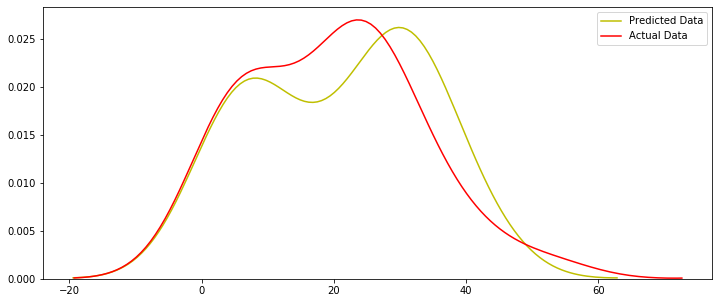

In [260]:
fig = plt.figure(figsize=(12, 5))

ax1 = sns.distplot(lr.predict(x_test), hist=False, color='y', label='Predicted Data')
ax2 = sns.distplot(y_test, hist=False,color='r', label='Actual Data', ax=ax1)